# Soccer Mining League
## Predict result one league and one season

#### Data Mining PESC/COPPE/UFRJ
#### Required: Python 3.5, Numpy, Scikit-Learn, Matplotlib

In [202]:
import numpy as np

#Sklearn -- preprocessing 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Plots
%matplotlib inline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score

# Soccer Mining League Functions
from functions import *

## Reading dataset

#### Reading from file

In [203]:
trainTest = np.loadtxt("../dataset/formated_files/matchs_teams_players_germany_league_2015_2016_formated.csv",delimiter=",")

#### Recover output

In [204]:
outputs = trainTest[:,907]
outputsR = trainTest[:,[908,909]]


## Preprocessing

#### Plot PCA Expectrum for Tatics  (One Team)

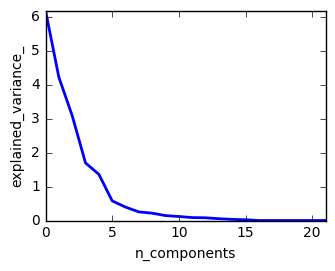

In [205]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
plotPCASpectrum(homeTatics)

#### Plot PCA Expectrum for team rating (One Team)

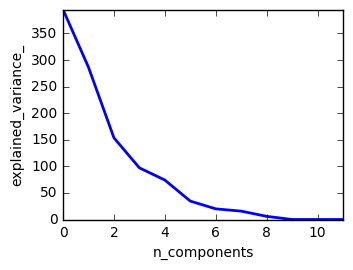

In [206]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
plotPCASpectrum(homeRateTeam)

#### Plot PCA Expectrum for one Player

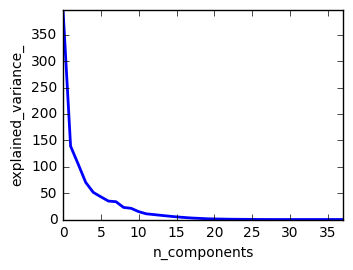

In [207]:
homeRateTeam = trainTest[:,71:109]
plotPCASpectrum(homeRateTeam)

#### Reducing Dimensionality for Tatics

In [208]:
homeTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,25,26,27,28,29,30,31,32,33,34,35]]
awayTatics = trainTest[:,[14,15,16,17,18,19,20,21,22,23,24,36,37,38,39,40,41,42,43,44,45,46]]

pca = decomposition.PCA(n_components=5)
homeTaticspreprocessed = pca.fit_transform(homeTatics)

pca = decomposition.PCA(n_components=5)
awayTaticspreprocessed = pca.fit_transform(awayTatics)

#### Reducing Dimensionality for team ratings

In [209]:
homeRateTeam = trainTest[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = trainTest[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Reducing Dimensionality for players

In [210]:
xTatics = trainTest[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

playersRD = [decomposition.PCA(n_components=9).fit_transform(np.concatenate((trainTest[:,range(71+(pos*38),71+((pos+1)*38))],xTatics[:,[pos,pos+22]]),axis=1)) for pos in range(22)]




#### Maximize sparse teams

In [211]:
enc = preprocessing.OneHotEncoder()
enc.fit(trainTest[:,[0]])
teamsH = enc.transform(trainTest[:,[0]]) 
teamsA = enc.transform(trainTest[:,[1]]) 
teams = (teamsH + teamsA).toarray()

#### Concatenate inputs

In [212]:
date = trainTest[:,[2]]
inputs = np.concatenate((homeRateTeamPreprocessed,awayRateTeampreprocessed,teams), axis=1)

for playerRD in playersRD:
    inputs = np.concatenate((inputs,playerRD), axis=1)



#### Scaling inputs

In [213]:
inputs = StandardScaler().fit_transform(inputs)

## Classification 

#### Using KFold with Naive Bayes

In [214]:
resultSVM = KFoldNB(inputs,outputs)

gnb = GaussianNB()
np.mean(cross_val_score(gnb, inputs, outputs, scoring='accuracy', cv=10))

Naive Bayes: = Score:4.82e-01[+/- 8.18e-02]


0.4830241935483871

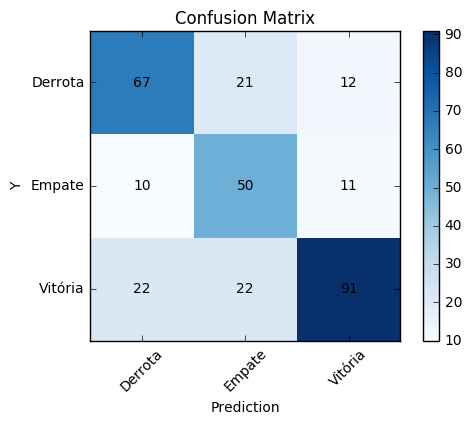

In [215]:
gnb.fit(inputs, outputs)

y_predict = gnb.predict(inputs)
plotConfusionMatrix(outputs, y_predict)

#### Using KFold with SVM

In [216]:
clf = svm.SVC()
np.mean(cross_val_score(clf,inputs,outputs,cv=10))

0.54248655913978483

#### Using KFold with Logistic Regression

In [217]:
clf = LogisticRegression(penalty='l1')
np.mean(cross_val_score(clf,inputs,outputs,cv=10))

0.47344086021505383

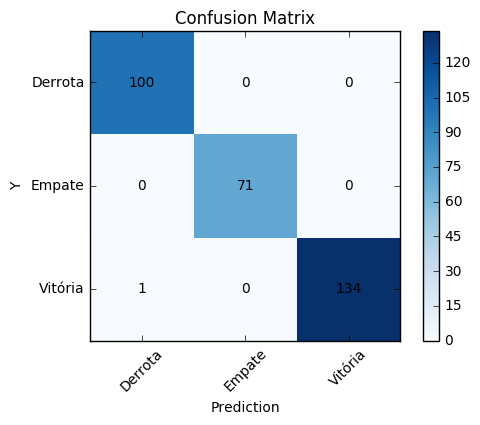

In [218]:
clf.fit(inputs, outputs)
y_predict = clf.predict(inputs)
plotConfusionMatrix(outputs, y_predict)

#### Using KFold with KNeighborsClassifier

In [219]:
clf = KNeighborsClassifier(n_neighbors=15)
np.mean(cross_val_score(clf,inputs,outputs,cv=10))

0.51365591397849464

#### Using SVM - Regression for predict number of goals before predict winning team

In [220]:
clf = svm.SVR()
KFoldRC(clf,inputs,outputsR)

[ 1.37317027  1.17932561  1.46475557  1.07159386  0.94513064]
[ 0.64619958  1.21106323  1.43855815  1.35052807  1.68135979]
[ 1.05712794  1.39668046  0.87394204  1.38860772  0.92760538]
[ 1.28787509  1.31235649  1.36234404  0.93922295  1.50896392]
[ 2.41074213  0.72260832  1.57198208  1.08848112  1.85586705]
[ 1.1329378   1.53082555  0.8535971   1.2620872   0.91861883]
[ 2.08887493  0.80933357  1.1605334   2.49250368  2.45030547]
[ 0.58392462  1.24817532  1.74171146  0.92871063  0.77538636]
[ 1.97135042  1.58930498  1.31698838  1.91980442  2.45839074]
[ 1.09325739  1.1689743   0.78148434  0.93918164  0.63163996]
[ 1.3254577   1.19804308  1.77746029  1.26981653  1.43207123]
[ 0.12242969  1.20636697  1.11639808  1.55068471  1.24944922]
[ 1.21495319  1.26660689  1.23764595  1.721666    0.85348554]
[ 1.06487402  1.62193097  0.93273733  0.68708732  1.41246564]
[ 1.32655422  0.82603544  0.65800378  1.37692585  1.36316701]
[ 0.71210403  1.11535044  1.66365748  1.22733016  1.43835769]
[ 1.0339

0.55419354838709678